# Fase 3 - Selecção de Variáveis para Modelo de Cox

In [1]:
# directoria de trabalho
setwd('')
# chamar pacotes survival, DBI (para ligar base-de-dados), ggplot2 (graficos), survminer (graficos)
library(survival)
library(RSQLite)
library(DBI)
library(ggplot2)
library(plyr)
library("IRdisplay")
color_pallete_function <- colorRampPalette(
  colors = c("black","red","green3","blue" ,"cyan","orange"),
  space = "Lab"
);
num_colors=6;
colors <- color_pallete_function(num_colors);

## 3.1 Modelo "Casa"

In [2]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db")
data <- dbGetQuery(foot, 'SELECT tempo, (cens + equip)%2 as cens, odds FROM goal_1')
dbDisconnect(foot)
rm(foot)

In [3]:
ligas <- c(rep(1,1347),rep(2,1781),rep(3,1443),rep(4,1808),rep(5,1788),rep(6,1836))
casa <- data$tempo
cens1 <- data$cens
odds1 <- as.numeric(data$odds)
rm(data)

In [4]:
#modelo
fit <- coxph(Surv(casa, cens1) ~ factor(ligas) + odds1, method="breslow")
summary(fit)

Call:
coxph(formula = Surv(casa, cens1) ~ factor(ligas) + odds1, method = "breslow")

  n= 10003, number of events= 5321 

                   coef exp(coef) se(coef)       z Pr(>|z|)    
factor(ligas)2  0.01695   1.01709  0.05011   0.338   0.7352    
factor(ligas)3  0.10821   1.11428  0.05220   2.073   0.0382 *  
factor(ligas)4  0.02142   1.02165  0.04968   0.431   0.6663    
factor(ligas)5 -0.05227   0.94907  0.04992  -1.047   0.2950    
factor(ligas)6  0.01460   1.01471  0.04951   0.295   0.7681    
odds1          -0.20372   0.81569  0.01192 -17.090   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
factor(ligas)2    1.0171     0.9832    0.9220     1.122
factor(ligas)3    1.1143     0.8974    1.0059     1.234
factor(ligas)4    1.0217     0.9788    0.9269     1.126
factor(ligas)5    0.9491     1.0537    0.8606     1.047
factor(ligas)6    1.0147     0.9855    0.9209     1.118
odds1             0.8157 

In [6]:
rsch <- resid(fit, type="scaledsch")
summary(rsch)

       V1                  V2                  V3                  V4          
 Min.   :-7.783071   Min.   :-7.700502   Min.   :-7.695594   Min.   :-7.84998  
 1st Qu.:-0.070520   1st Qu.: 0.007632   1st Qu.:-0.002766   1st Qu.:-0.11847  
 Median :-0.004705   Median : 0.089682   Median : 0.018553   Median :-0.06447  
 Mean   : 0.016950   Mean   : 0.108212   Mean   : 0.021421   Mean   :-0.05228  
 3rd Qu.: 0.128879   3rd Qu.: 0.225782   3rd Qu.: 0.061236   3rd Qu.: 0.03381  
 Max.   : 7.360023   Max.   : 7.439627   Max.   : 5.661534   Max.   : 6.24568  
       V5                  V6          
 Min.   :-7.760001   Min.   :-1.21252  
 1st Qu.:-0.041538   1st Qu.:-0.78446  
 Median :-0.003198   Median :-0.44197  
 Mean   : 0.014600   Mean   :-0.20372  
 3rd Qu.: 0.116035   3rd Qu.:-0.08039  
 Max.   : 5.989729   Max.   :14.01511  

                    rho   chisq        p
factor(ligas)2 -0.00274  0.0401 0.841338
factor(ligas)3  0.00522  0.1452 0.703210
factor(ligas)4  0.02007  2.1428 0.143238
factor(ligas)5  0.02546  3.4479 0.063334
factor(ligas)6  0.01693  1.5253 0.216821
odds1          -0.03691 11.3517 0.000754
GLOBAL               NA 19.1120 0.003979

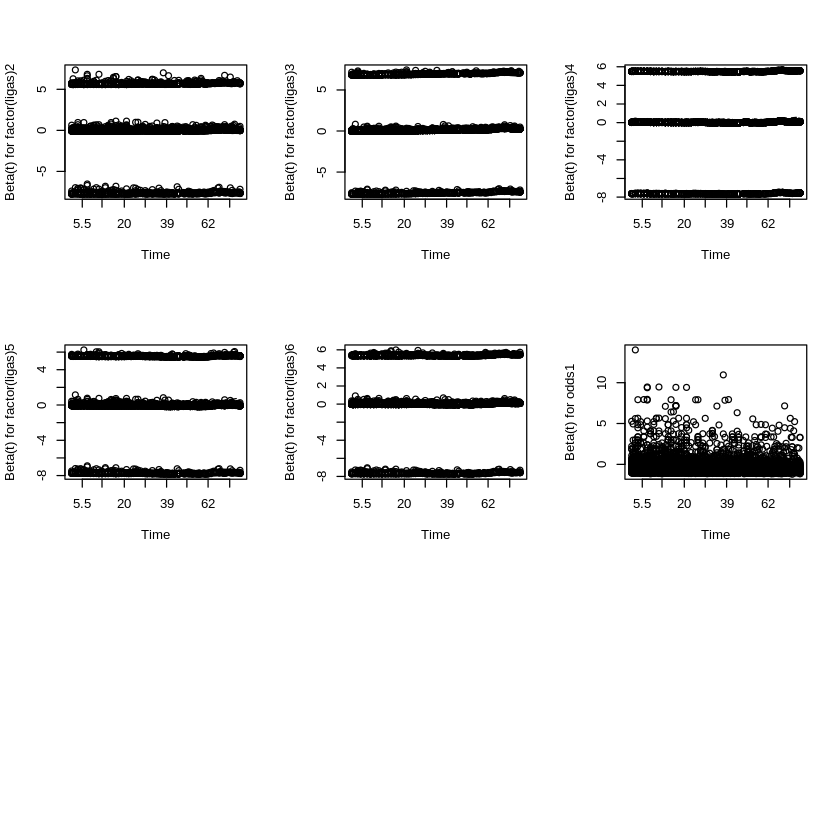

In [7]:
cox.zph(fit, transform="identity")
par(mfrow=c(3,3))
plot(cox.zph(fit))

#### 3.1.1. Ajustar modelo retirando uma variável de cada vez

retirar -> ligas=6

In [ ]:
ligas <- c(rep(1,1347),rep(2,1781),rep(3,1443),rep(4,1808),rep(5,1788),rep(1,1836))

In [ ]:
#novo modelo
fit1 <- coxph(Surv(casa, cens1) ~ factor(ligas) + odds1, method="breslow")
summary(fit1)

In [ ]:
TRV <- 2*(fit$loglik[2]-fit1$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

Como TRV < p-value então não existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (do not reject null)

retirar -> ligas=2

In [ ]:
ligas <- c(rep(1,1347),rep(1,1781),rep(3,1443),rep(4,1808),rep(5,1788),rep(1,1836))

In [ ]:
#novo modelo
fit2 <- coxph(Surv(casa, cens1) ~ factor(ligas) + odds1, method="breslow")
summary(fit2)

In [ ]:
TRV <- 2*(fit$loglik[2]-fit2$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

Como TRV < p-value então não existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (do not reject null)

retirar -> ligas=4

In [ ]:
ligas <- c(rep(1,1347),rep(1,1781),rep(3,1443),rep(1,1808),rep(5,1788),rep(1,1836))

In [ ]:
#novo modelo
fit3 <- coxph(Surv(casa, cens1) ~ factor(ligas) + odds1, method="breslow")
summary(fit3)

In [ ]:
TRV <- 2*(fit$loglik[2]-fit3$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

Como TRV < p-value então não existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (do not reject null)

retirar -> ligas=5

In [ ]:
ligas <- c(rep(1,1347),rep(1,1781),rep(3,1443),rep(1,1808),rep(1,1788),rep(1,1836))

In [ ]:
#novo modelo
fit4 <- coxph(Surv(casa, cens1) ~ factor(ligas) + odds1, method="breslow")
summary(fit4)

In [ ]:
TRV <- 2*(fit$loglik[2]-fit4$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

Como TRV > p-value então existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (reject null)

PARAR PROCESSO DE SELEÇÃO DE VARIÁVEIS => usar modelo com ligas=5

In [ ]:
cox.zph(fit4, transform="identity")

In [ ]:
par(mfrow=c(2, 1))
plot(cox.zph(fit4))

## 3.2 Modelo "Fora"

In [2]:
#recolher dados
foot <- dbConnect(RSQLite::SQLite(), "foot.db")
data <- dbGetQuery(foot, 'SELECT tempo, (cens + equip)/2 as cens, odds FROM goal_1')
dbDisconnect(foot)
rm(foot)

In [3]:
ligas <- c(rep(1,1347),rep(2,1781),rep(3,1443),rep(4,1808),rep(5,1788),rep(6,1836))
fora <- data$tempo
cens2 <- data$cens
odds2 <- as.numeric(data$odds)
rm(data)

In [4]:
#modelo
fit <- coxph(Surv(fora, cens2) ~ factor(ligas) + odds2, method="breslow")
summary(fit)

Call:
coxph(formula = Surv(fora, cens2) ~ factor(ligas) + odds2, method = "breslow")

  n= 10003, number of events= 3882 

                   coef exp(coef) se(coef)      z Pr(>|z|)    
factor(ligas)2 0.033617  1.034189 0.057389  0.586   0.5580    
factor(ligas)3 0.118111  1.125369 0.060330  1.958   0.0503 .  
factor(ligas)4 0.008345  1.008380 0.057912  0.144   0.8854    
factor(ligas)5 0.023360  1.023635 0.057982  0.403   0.6870    
factor(ligas)6 0.046282  1.047370 0.057549  0.804   0.4213    
odds2          0.103607  1.109165 0.005269 19.662   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
factor(ligas)2     1.034     0.9669    0.9242     1.157
factor(ligas)3     1.125     0.8886    0.9999     1.267
factor(ligas)4     1.008     0.9917    0.9002     1.130
factor(ligas)5     1.024     0.9769    0.9137     1.147
factor(ligas)6     1.047     0.9548    0.9357     1.172
odds2              1.109     0.9

##### 3.2.1. Ajustar modelo retirando uma variável de cada vez

retirar -> ligas=4

In [5]:
ligas <- c(rep(1,1347),rep(2,1781),rep(3,1443),rep(1,1808),rep(5,1788),rep(6,1836))
#novo modelo
fit1 <- coxph(Surv(fora, cens2) ~ factor(ligas) + odds2, method="breslow")
summary(fit1)

Call:
coxph(formula = Surv(fora, cens2) ~ factor(ligas) + odds2, method = "breslow")

  n= 10003, number of events= 3882 

                   coef exp(coef) se(coef)      z Pr(>|z|)    
factor(ligas)2 0.028985  1.029409 0.047502  0.610   0.5417    
factor(ligas)3 0.113443  1.120128 0.050859  2.231   0.0257 *  
factor(ligas)5 0.018647  1.018822 0.047838  0.390   0.6967    
factor(ligas)6 0.041582  1.042459 0.047373  0.878   0.3801    
odds2          0.103548  1.109100 0.005254 19.710   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
factor(ligas)2     1.029     0.9714    0.9379     1.130
factor(ligas)3     1.120     0.8928    1.0139     1.238
factor(ligas)5     1.019     0.9815    0.9276     1.119
factor(ligas)6     1.042     0.9593    0.9500     1.144
odds2              1.109     0.9016    1.0977     1.121

Concordance= 0.593  (se = 0.005 )
Rsquare= 0.03   (max possible= 0.999 )
Likelihood ratio test

In [6]:
TRV <- 2*(fit$loglik[2]-fit1$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.02077291

[1] 0.3781149

Como TRV < p-value então não existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (do not reject null)

retirar -> ligas=5

In [7]:
ligas <- c(rep(1,1347),rep(2,1781),rep(3,1443),rep(1,1808),rep(1,1788),rep(6,1836))
#novo modelo
fit2 <- coxph(Surv(fora, cens2) ~ factor(ligas) + odds2, method="breslow")
summary(fit2)

Call:
coxph(formula = Surv(fora, cens2) ~ factor(ligas) + odds2, method = "breslow")

  n= 10003, number of events= 3882 

                   coef exp(coef) se(coef)      z Pr(>|z|)    
factor(ligas)2 0.022441  1.022695 0.044396  0.505   0.6132    
factor(ligas)3 0.106805  1.112717 0.047886  2.230   0.0257 *  
factor(ligas)6 0.034855  1.035469 0.044078  0.791   0.4291    
odds2          0.103391  1.108924 0.005239 19.734   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
factor(ligas)2     1.023     0.9778    0.9375     1.116
factor(ligas)3     1.113     0.8987    1.0130     1.222
factor(ligas)6     1.035     0.9657    0.9498     1.129
odds2              1.109     0.9018    1.0976     1.120

Concordance= 0.593  (se = 0.005 )
Rsquare= 0.03   (max possible= 0.999 )
Likelihood ratio test= 302.4  on 4 df,   p=<2e-16
Wald test            = 402.8  on 4 df,   p=<2e-16
Score (logrank) test = 411  on 4 df,   p

In [8]:
TRV <- 2*(fit$loglik[2]-fit2$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.1724533

[1] 0.3781149

Como TRV < p-value então não existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (do not reject null)

retirar -> ligas=2

In [9]:
ligas <- c(rep(1,1347),rep(1,1781),rep(3,1443),rep(1,1808),rep(1,1788),rep(6,1836))
#novo modelo
fit3 <- coxph(Surv(fora, cens2) ~ factor(ligas) + odds2, method="breslow")
summary(fit3)

Call:
coxph(formula = Surv(fora, cens2) ~ factor(ligas) + odds2, method = "breslow")

  n= 10003, number of events= 3882 

                   coef exp(coef) se(coef)      z Pr(>|z|)    
factor(ligas)3 0.100777  1.106030 0.046353  2.174   0.0297 *  
factor(ligas)6 0.028993  1.029417 0.042498  0.682   0.4951    
odds2          0.103677  1.109242 0.005214 19.886   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
factor(ligas)3     1.106     0.9041    1.0100     1.211
factor(ligas)6     1.029     0.9714    0.9471     1.119
odds2              1.109     0.9015    1.0980     1.121

Concordance= 0.593  (se = 0.005 )
Rsquare= 0.03   (max possible= 0.999 )
Likelihood ratio test= 302.2  on 3 df,   p=<2e-16
Wald test            = 401.8  on 3 df,   p=<2e-16
Score (logrank) test = 409.9  on 3 df,   p=<2e-16


In [10]:
TRV <- 2*(fit$loglik[2]-fit3$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.4270907

[1] 0.3781149

In [11]:
ligas <- c(rep(1,1347),rep(1,1781),rep(3,1443),rep(1,1808),rep(1,1788),rep(1,1836))
#novo modelo
fit4 <- coxph(Surv(fora, cens2) ~ factor(ligas) + odds2, method="breslow")
summary(fit4)

Call:
coxph(formula = Surv(fora, cens2) ~ factor(ligas) + odds2, method = "breslow")

  n= 10003, number of events= 3882 

                   coef exp(coef) se(coef)      z Pr(>|z|)    
factor(ligas)3 0.094705  1.099334 0.045470  2.083   0.0373 *  
odds2          0.103471  1.109013 0.005203 19.885   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
factor(ligas)3     1.099     0.9096     1.006     1.202
odds2              1.109     0.9017     1.098     1.120

Concordance= 0.593  (se = 0.005 )
Rsquare= 0.03   (max possible= 0.999 )
Likelihood ratio test= 301.7  on 2 df,   p=<2e-16
Wald test            = 401.5  on 2 df,   p=<2e-16
Score (logrank) test = 409.6  on 2 df,   p=<2e-16


In [12]:
TRV <- 2*(fit$loglik[2]-fit4$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.8899422

[1] 0.3781149

Como TRV > p-value então existe significância estatística para afirmar que o modelo inicial é diferente do novo modelo. (REJECT NULL)

PARAR PROCESSO DE SELEÇÃO DE VARIÁVEIS => usar modelo com ligas=2

In [ ]:
cox.zph(fit2, transform="identity")

In [ ]:
par(mfrow=c(2,2))
plot(cox.zph(fit2))

## 3.3. Análise de Modelos

### 3.3.1. Comparação Modelos "casa" vs. "fora"

In [4]:
#modelo casa
foot <- dbConnect(RSQLite::SQLite(), "foot.db")
data <- dbGetQuery(foot, 'SELECT tempo, (cens + equip)%2 as cens, odds FROM goal_1')
dbDisconnect(foot)
rm(foot)
ligas <- factor(c(rep(1,1347),rep(1,1781),rep(3,1443),rep(1,1808),rep(5,1788),rep(1,1836)))
casa <- data$tempo
cens1 <- data$cens
odds1 <- as.numeric(data$odds)
fit_casa <- coxph(formula = Surv(casa, cens1)~ ligas + odds1, method="breslow")
summary(fit_casa)
cox.zph(fit_casa, transform="identity")

Call:
coxph(formula = Surv(casa, cens1) ~ ligas + odds1, method = "breslow")

  n= 10003, number of events= 5321 

           coef exp(coef) se(coef)       z Pr(>|z|)    
ligas3  0.09400   1.09857  0.03954   2.378   0.0174 *  
ligas5 -0.06648   0.93568  0.03647  -1.823   0.0683 .  
odds1  -0.20377   0.81565  0.01191 -17.107   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

       exp(coef) exp(-coef) lower .95 upper .95
ligas3    1.0986     0.9103    1.0167    1.1871
ligas5    0.9357     1.0687    0.8711    1.0050
odds1     0.8156     1.2260    0.7968    0.8349

Concordance= 0.592  (se = 0.004 )
Rsquare= 0.042   (max possible= 1 )
Likelihood ratio test= 424.6  on 3 df,   p=<2e-16
Wald test            = 303.1  on 3 df,   p=<2e-16
Score (logrank) test = 303.3  on 3 df,   p=<2e-16


            rho  chisq        p
ligas3 -0.00485  0.125 0.723772
ligas5  0.02212  2.602 0.106748
odds1  -0.03659 11.154 0.000838
GLOBAL       NA 14.329 0.002490

<h2>
<table style="border:2px">
    <tr><td>Var</td><td><p style="text-align:center">$ \beta_i$</p></td></tr>
    <tr><td>ligas</td><td>ligas3=0.09400, ligas5=-0.06648</td></tr>
    <tr><td>odds</td><td><p style="text-align:center">-0.20377</p></td></tr>
</table>
</h2>

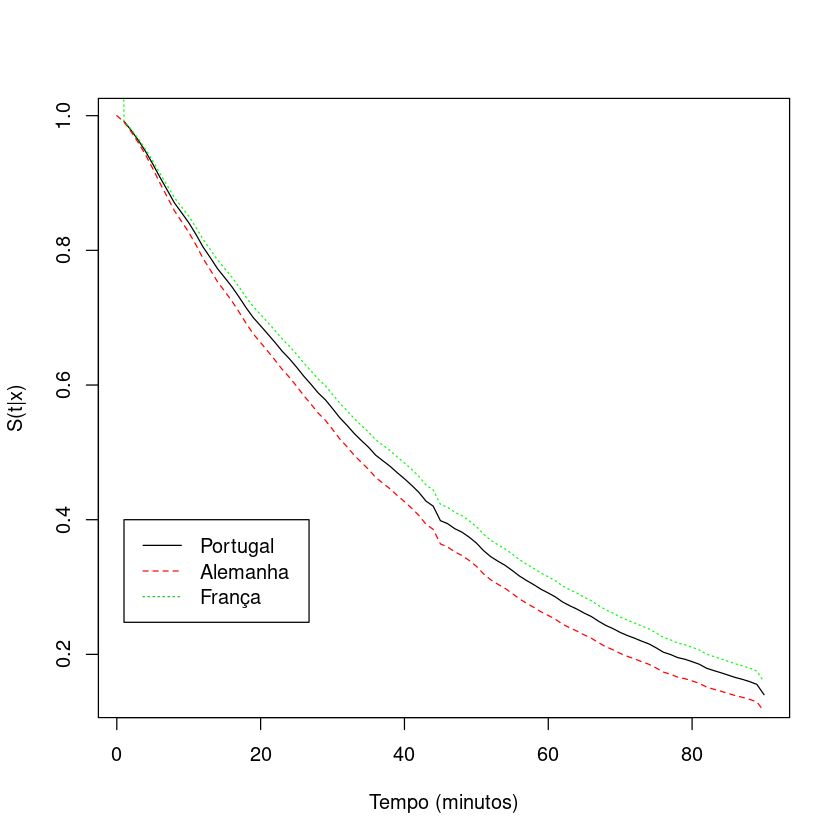

In [12]:
htc <- basehaz(fit_casa, centered=F)
tempo <- htc$time
H0 <- htc$hazard
S0 <- exp(-H0)
S_ligas_base <- S0^exp(-0.20377)
S_ligas3 <- S0^exp(0.09400 - 0.20377)
S_ligas5 <- S0^exp(-0.06648 - 0.20377)
plot(tempo, S_ligas_base, lty=1, type="l", ylim=c(0.1,1), xlab="Tempo (minutos)", ylab="S(t|x)",col="black")
lines(c(0, tempo), c(1, S_ligas3), lty=2,col="red")
lines(c(0, tempo), c(2, S_ligas5), lty=3,col="green")
legend(1, 0.4, lty=c(1, 2, 3), c("Portugal", "Alemanha", "França"),col=colors)

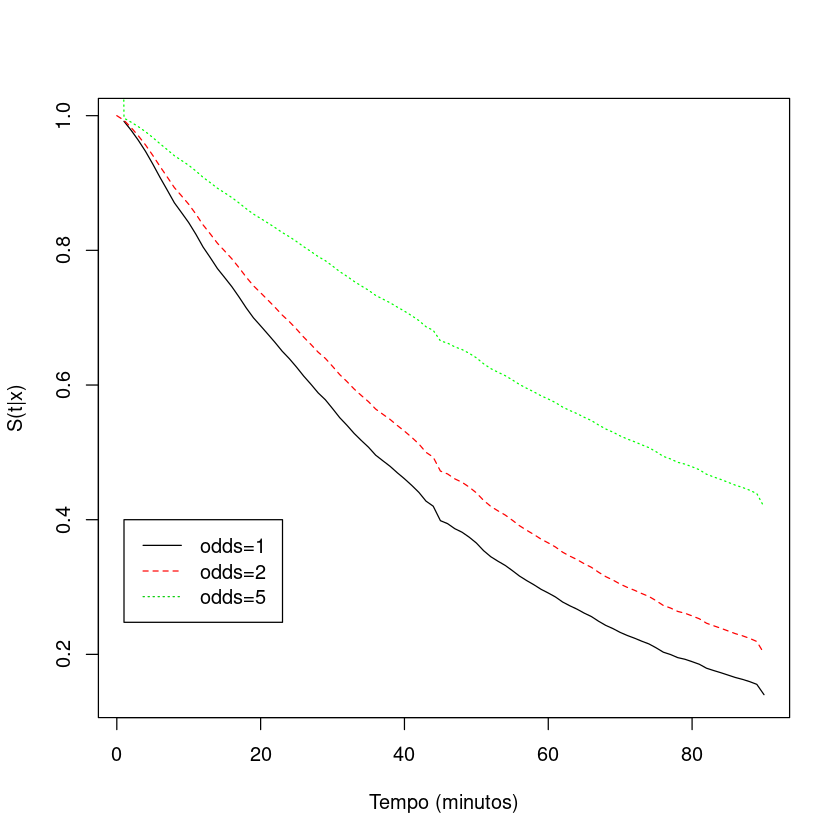

In [13]:
htc <- basehaz(fit_casa, centered=F)
tempo <- htc$time
H0 <- htc$hazard
S0 <- exp(-H0)
S_ligas_base <- S0^exp(-0.20377)
S_ligas3 <- S0^exp(- 0.20377*2)
S_ligas5 <- S0^exp(- 0.20377*5)
plot(tempo, S_ligas_base, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)",col="black")
lines(c(0, tempo), c(1, S_ligas3), lty=2,col="red")
lines(c(0, tempo), c(2, S_ligas5), lty=3,col="green")
legend(1, 0.4, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"),col=colors)

In [14]:
# modelo fora
foot <- dbConnect(RSQLite::SQLite(), "foot.db")
data_f <- dbGetQuery(foot, 'SELECT tempo, (cens + equip)/2 as cens, odds FROM goal_1')
dbDisconnect(foot)
rm(foot)
ligas <- factor(c(rep(1,1347),rep(2,1781),rep(3,1443),rep(1,1808),rep(1,1788),rep(6,1836)))
fora <- data_f$tempo
cens2 <- data_f$cens
odds2 <- as.numeric(data_f$odds)
dados2 <- data.frame(fora, cens2, ligas, odds2)
rm(data_f)
fit_fora <- coxph(Surv(fora, cens2) ~ ligas + odds2, method="breslow")
summary(fit_fora)
cox.zph(fit_fora, transform="identity")

Call:
coxph(formula = Surv(fora, cens2) ~ ligas + odds2, method = "breslow")

  n= 10003, number of events= 3882 

           coef exp(coef) se(coef)      z Pr(>|z|)    
ligas2 0.022441  1.022695 0.044396  0.505   0.6132    
ligas3 0.106805  1.112717 0.047886  2.230   0.0257 *  
ligas6 0.034855  1.035469 0.044078  0.791   0.4291    
odds2  0.103391  1.108924 0.005239 19.734   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

       exp(coef) exp(-coef) lower .95 upper .95
ligas2     1.023     0.9778    0.9375     1.116
ligas3     1.113     0.8987    1.0130     1.222
ligas6     1.035     0.9657    0.9498     1.129
odds2      1.109     0.9018    1.0976     1.120

Concordance= 0.593  (se = 0.005 )
Rsquare= 0.03   (max possible= 0.999 )
Likelihood ratio test= 302.4  on 4 df,   p=<2e-16
Wald test            = 402.8  on 4 df,   p=<2e-16
Score (logrank) test = 411  on 4 df,   p=<2e-16


            rho   chisq      p
ligas2 0.013647 0.72990 0.3929
ligas3 0.000778 0.00235 0.9613
ligas6 0.011383 0.50304 0.4782
odds2  0.039987 4.68566 0.0304
GLOBAL       NA 6.07425 0.1937

<h2>
<table>
    <tr><td>Var</td><td><p style="text-align:center">$ \beta_i$</p></td></tr>
    <tr><td>ligas</td><td>ligas2=0.022441, ligas3=0.10680, ligas6=0.03485</td></tr>
    <tr><td>odds</td><td><p style="text-align:center">0.10339</p></td></tr>
</table>
</h2>

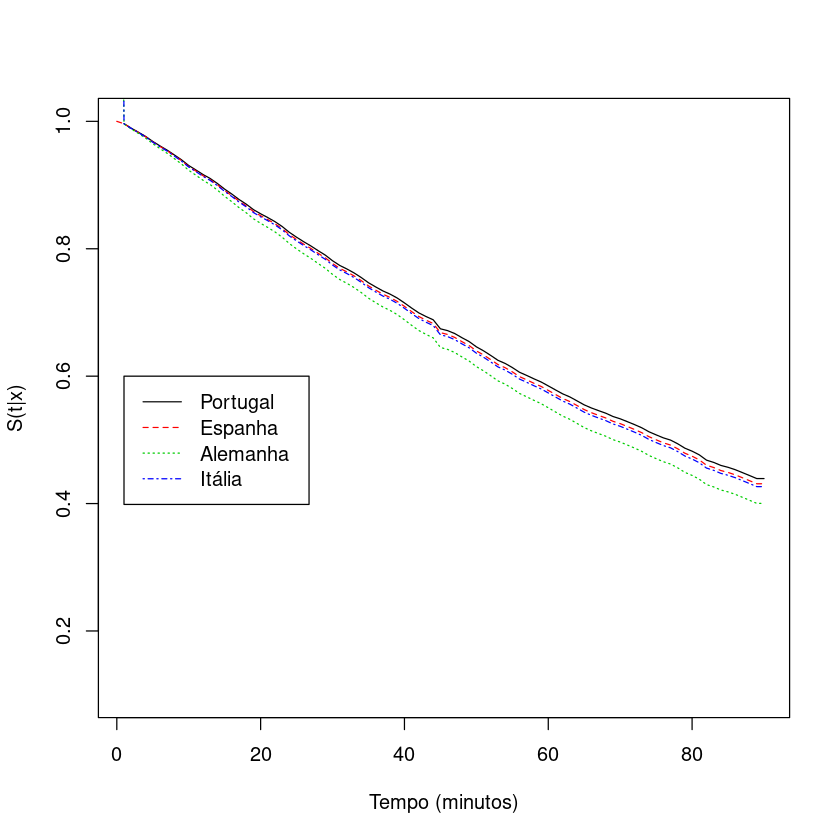

In [29]:
ht <- basehaz(fit_fora, centered=F)
tempo <- ht$time
H0 <- ht$hazard
S0 <- exp(-H0)
S_ligas_base_f <- S0^exp(0.10339)
S_ligas2 <- S0^exp(0.022441 + 0.10339)
S_ligas3 <- S0^exp(0.10680 + 0.10339)
S_ligas6 <- S0^exp(0.03485 + 0.10339)
plot(tempo, S_ligas_base_f, lty=1, type="l", ylim=c(0.1,1), xlab="Tempo (minutos)", ylab="S(t|x)",col="black")
lines(c(0, tempo), c(1, S_ligas2), lty=2,col="red")
lines(c(0, tempo), c(2, S_ligas3), lty=3,col="green3")
lines(c(0,tempo), c(3, S_ligas6), lty=4,col="blue")
legend(1, 0.6, lty=c(1, 2, 3, 4, 5, 6), c("Portugal", "Espanha", "Alemanha", "Itália"),col=colors)

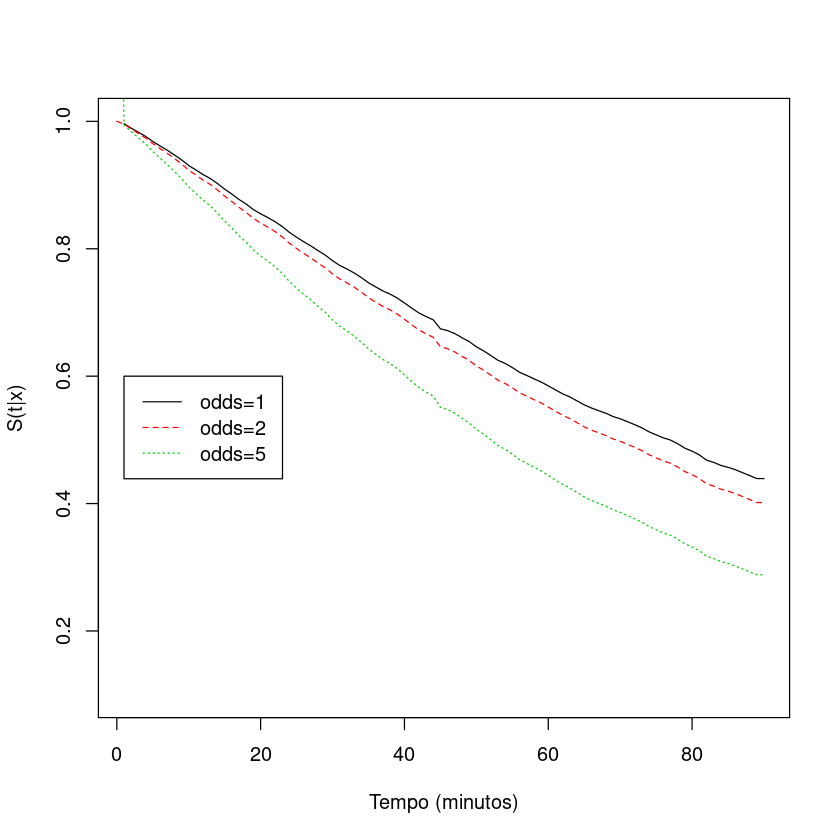

In [31]:
ht <- basehaz(fit_fora, centered=F)
tempo <- ht$time
H0 <- ht$hazard
S0 <- exp(-H0)
S_ligas_base_f <- S0^exp(0.10339)
S_ligas2 <- S0^exp(2*0.10339)
S_ligas3 <- S0^exp(5*0.10339)
plot(tempo, S_ligas_base_f, lty=1, type="l", ylim=c(0.1,1), xlab="Tempo (minutos)", ylab="S(t|x)",col="black")
lines(c(0, tempo), c(1, S_ligas2), lty=2,col="red")
lines(c(0, tempo), c(2, S_ligas3), lty=3,col="green3")
legend(1, 0.6, lty=c(1, 2, 3, 4, 5, 6), c("odds=1", "odds=2", "odds=5"),col=colors)

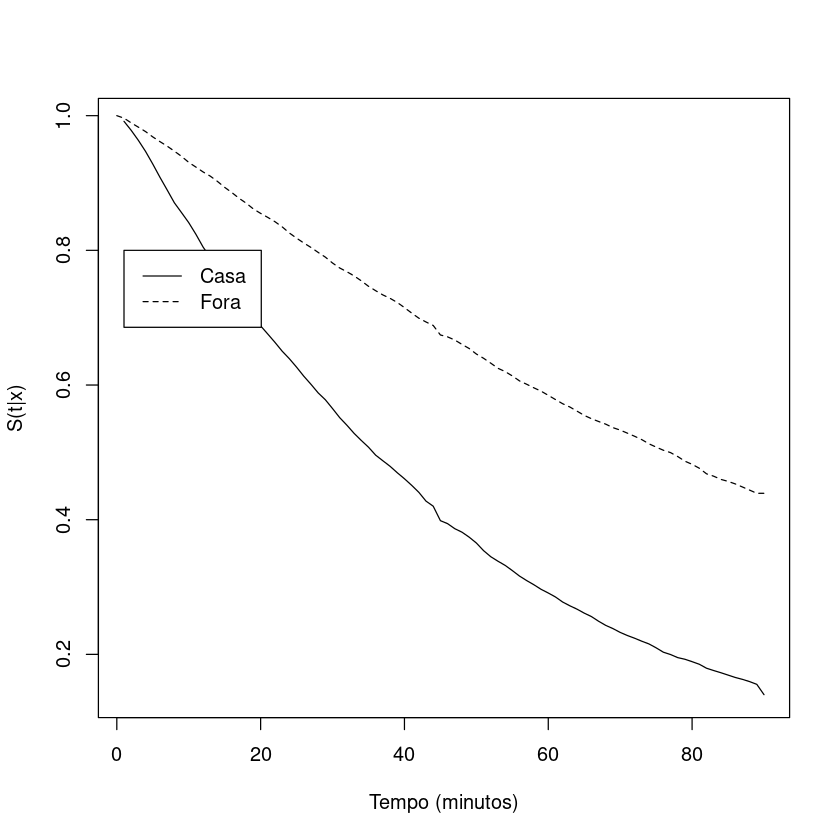

In [30]:
plot(tempo, S_ligas_base, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)")
lines(c(0, tempo), c(1, S_ligas_base_f), lty=2)
legend(1, 0.8, lty=c(1, 2, 3, 4, 5, 6), c("Casa", "Fora"))